# SYDE 556/750 --- Assignment 1
**Student ID: 20654471**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_01/syde556_assignment_01.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize # For question 2.1b)


# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

Populating the interactive namespace from numpy and matplotlib


# 1. Representation of Scalars

## 1.1 Basic encoding and decoding

**a) Computing gain and bias.** In general, for a neuron model $a = G[J]$ (and assuming that the inverse $J = G^{-1}[a]$ exists), solve the following system of equations to compute the gain $\alpha$, and the bias $J^\mathrm{bias}$ given a maximum rate $a^\mathrm{max}$ and an $x$-intercept $\xi$.

$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}] \,, \quad\quad 0 = G[\alpha \xi + J^\mathrm{bias}] \,.$$

✍

$$J^\mathrm{bias} = \dfrac {J_{th} - G^{-1}[a^\mathrm{max}]}{(\xi -1)}, \alpha = \dfrac {J_{th} - G^{-1}[a^\mathrm{max}]}{(1 - \xi)}$$

Now, simplify these equations for the specific case $G[J] = \max(J, 0)$.

✍ $$ \alpha =  \dfrac {a^\mathrm{max}}{1 - \xi}, J^\mathrm{bias} = \dfrac {a^\mathrm{max}\xi}{\xi -1}$$


**b) Neuron tuning curves.** Plot the neuron tuning curves $a_i(x)$ for 16 randomly generated neurons following the intercept and maximum rate distributions described above.

In [2]:
class RectifiedLinearNeuronShell: 
    def __init__(self, aMax, zeta, encoder):
        
        #preset values
        self._aMax = aMax
        self._zeta = zeta
        self._encoder = encoder
        
        #calculated values
        self._alpha = (self._aMax)/(1 - self._zeta)
        self._jBias = -(self._alpha)*(self._zeta) #same as aMax*zeta/(zeta -1)
        
        
   # def tuningCurve(self, xAxis):
      #  xAxis = np.array(xAxis,float)
      #  current = np.dot(self.a*xAxis, np.array(self._encoder)) + self._alpha
        #print(current)
        
      #  activity = np.vectorize()
        
      # return 
        
        
        
        

41


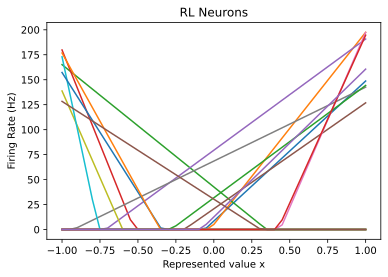

In [3]:
# ✍ 
        
#NeuronList = []    
#Jlist = []
#xAxis = []
        
numberNeurons = 16

aMax_array = np.random.uniform(100, 200, numberNeurons)
zeta_array = np.random.uniform(-0.95,0.95, numberNeurons)
encoder_array = np.random.choice([-1,1], numberNeurons)

def initializeRectifiedLinearNeurons(numNeurons,xScaling):
    #changed name to fit with assignment document, A is the "matrix of activities"
    A = np.zeros([numNeurons, len(xScaling)])
    for i in range (numNeurons):
        NewNeuron = RectifiedLinearNeuronShell(aMax_array[i],zeta_array[i],encoder_array[i])
        for j,k in enumerate(xScaling):
            a = NewNeuron._encoder*NewNeuron._alpha*k + NewNeuron._jBias
            A[i][j] = max(a,0)
    return A

xScale = np.linspace(-1,1,41)

A = initializeRectifiedLinearNeurons(numberNeurons, xScale)

for i in range(0,numberNeurons):
    plt.plot(xScale, A[i])
plt.xlabel("Represented value x") #not sure if "stimulus is the word I am looking for here"
plt.ylabel("Firing Rate (Hz)")
plt.title('RL Neurons');

print(len(xScale))


**c) Computing identity decoders.** Compute the optimal identity decoder $\vec d$ for those 16 neurons (as shown in class). Report the value of the individual decoder coefficients. Compute $d$ using the matrix notation mentioned in the course notes. Do not apply any regularization. $A$ is the matrix of activities (the same data used to generate the plot in 1.1b).

In [4]:
# ✍ seed note thing already done in provided code, that was a neat trick

#should probably make this into a function

def neuronDecoderNoNoise(A, xScale):
    Numsamples = len(xScale) 
    Atrans = A.transpose()
    Decoder = np.dot(np.linalg.inv(np.dot(A,Atrans)),np.dot(A,xScale))
    
    return Decoder

decoder = neuronDecoderNoNoise(A, xScale)

print ("d values \n" + str(decoder))
    

def rootMeanSquared(actual, predicted):
    return np.sqrt(((predicted - actual)**2).mean())
    

d values 
[-6.84396072e-04  2.23289551e-04 -4.70247749e-03 -3.01048659e-04
 -5.25274611e-04 -1.83602750e-03 -2.90982032e-03 -8.75973780e-04
  1.77910609e-04  9.05561544e-05 -2.23923278e-02  1.70203040e-02
  8.34612736e-03  4.04760113e-03  6.11897012e-04  2.34378302e-03]


**d) Evaluating decoding errors.** Compute and plot $\hat{x}=\sum_i d_i a_i(x)$. Overlay on the plot the line $y=x$. Make a separate plot of $x-\hat{x}$ to see what the error looks like. Report the Root Mean Squared Error (RMSE) value.

RMSE:0.0025979900612608624


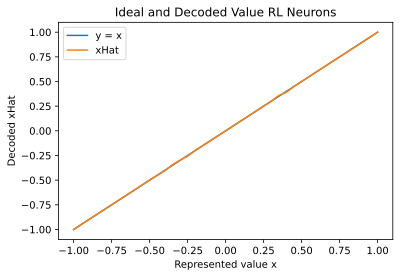

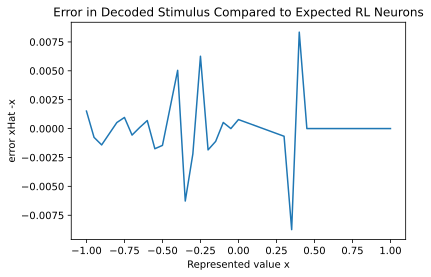

In [5]:
# ✍ 
xHat = np.dot(decoder, A)
y = xScale
error = y - xHat

plt.figure()
plt.plot(xScale, y , label = "y = x")
plt.plot(xScale, xHat, label = "xHat")
plt.legend()
plt.xlabel("Represented value x") #not sure if "stimulus is the word I am looking for here"
plt.ylabel("Decoded xHat")
plt.title('Ideal and Decoded Value RL Neurons');

plt.figure()
plt.plot(xScale, error)
plt.xlabel("Represented value x") #not sure if "stimulus is the word I am looking for here"
plt.ylabel("error xHat -x")
plt.title('Error in Decoded Stimulus Compared to Expected RL Neurons');

RMSE1 = str(rootMeanSquared(xHat,y))

print("RMSE:" + RMSE1)


**e) Decoding under noise.** Now try decoding under noise. Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean $\mu=0$ and standard deviation of $\sigma=0.2 \max(A)$ (where $\max(A)$ is the maximum firing rate of all the neurons). Resample this variable for every different $x$ value for every different neuron. Create all the same plots as in part d). Report the RMSE.

RMSE:0.7206108926151529


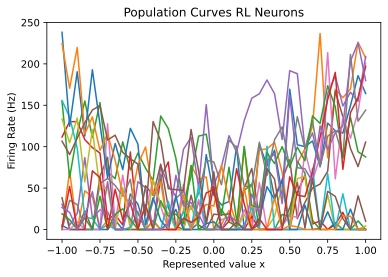

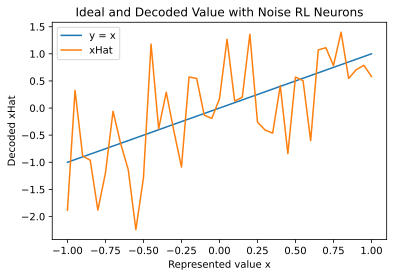

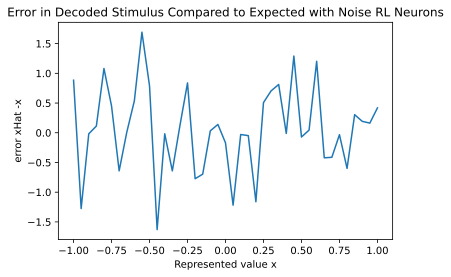

In [6]:
# ✍ 
#Adding noise 
#Parameters are mean, standard deviation and shape respectively - not ENTIRELY sure I understand what "shape" means in this context, but this seems to work
NoisyA = A + np.random.normal(0, 0.2*np.amax(A), np.shape(A))

#Firing rate should still bottom out at 0 sooooo
for i in range (len(NoisyA)):
    for j in range (len(NoisyA[0])):
        NoisyA[i][j] = max(NoisyA[i][j],0)

xHat = np.dot(decoder, NoisyA)
y = xScale
error = y - xHat

plt.figure() #Not sure if they are asking for this plot, will include in case, helped me spot the bottom out at zero issue
for i in range(0,numberNeurons):
    plt.plot(xScale, NoisyA[i])
plt.xlabel("Represented value x") 
plt.ylabel("Firing Rate (Hz)")
plt.title('Population Curves RL Neurons');

plt.figure()
plt.plot(xScale,y , label = "y = x")
plt.plot(xScale, xHat, label = "xHat")
plt.legend()
plt.xlabel("Represented value x") 
plt.ylabel("Decoded xHat")
plt.title('Ideal and Decoded Value with Noise RL Neurons');

plt.figure()
plt.plot(xScale, error)
plt.xlabel("Represented value x") 
plt.ylabel("error xHat -x")
plt.title('Error in Decoded Stimulus Compared to Expected with Noise RL Neurons');


RMSE2 = str(rootMeanSquared(xHat,y))

print("RMSE:" + RMSE2)


**f) Accounting for decoder noise.** Recompute the decoder $\vec d$ taking noise into account (i.e., apply the appropriate regularization, as shown in class). Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in d) and e). Report the RMSE for all cases.

RMSE:0.172693591204237
RMSE:0.055492881456567666


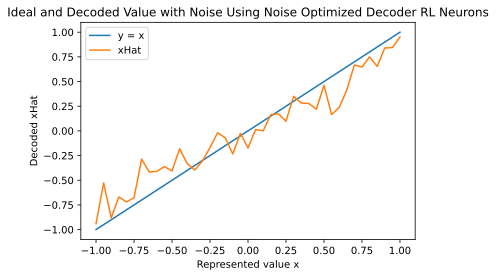

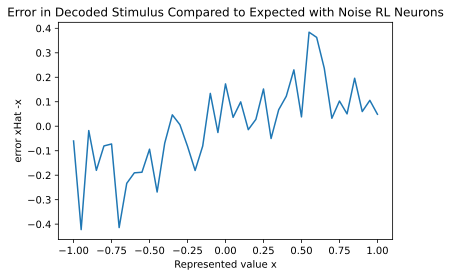

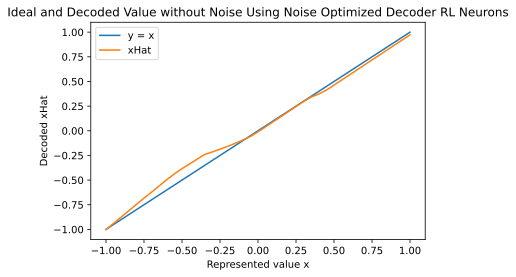

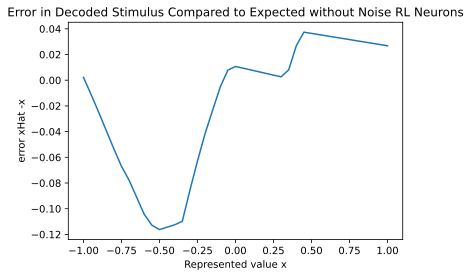

In [7]:
# ✍ 
def neuronDecoderWithNoise(A, xScale,stanDev):
    Numsamples = len(xScale) 
    Atrans = np.transpose(A)
    Decoder = np.dot(np.linalg.inv(np.divide((np.dot(A,Atrans)),Numsamples)+(stanDev)**2*np.identity(len(A))), np.dot(A,xScale)/Numsamples)
    
    return Decoder


decoder = neuronDecoderWithNoise(A, xScale, 0.2*np.amax(A)) #DO NOT ADD NOISE HERE

xHat = np.dot(decoder, NoisyA)
error = y - xHat

#print(y)
#print(xHat)
#print(error)

plt.figure()
plt.plot(xScale,y ,label = "y = x")
plt.plot(xScale, xHat, label = "xHat")
plt.legend()
plt.xlabel("Represented value x") 
plt.ylabel("Decoded xHat")
plt.title('Ideal and Decoded Value with Noise Using Noise Optimized Decoder RL Neurons');

plt.figure()
plt.plot(xScale, error)
plt.xlabel("Represented value x")
plt.ylabel("error xHat -x")
plt.title('Error in Decoded Stimulus Compared to Expected with Noise RL Neurons');



RMSE3 = str(rootMeanSquared(xHat,y))

print("RMSE:" + RMSE3)



xHat = np.dot(decoder, A)
error = y - xHat

#print(y)
#print(xHat)
#print(error)


plt.figure()
plt.plot(xScale,y, label = "y = x")
plt.plot(xScale, xHat, label = "xHat")
plt.legend()
plt.xlabel("Represented value x") 
plt.ylabel("Decoded xHat")
plt.title('Ideal and Decoded Value without Noise Using Noise Optimized Decoder RL Neurons');

plt.figure()
plt.plot(xScale, error)
plt.xlabel("Represented value x")
plt.ylabel("error xHat -x")
plt.title('Error in Decoded Stimulus Compared to Expected without Noise RL Neurons');

def rootMeanSquared(actual, predicted):
    return np.sqrt(((predicted - actual)**2).mean())

RMSE4 = str(rootMeanSquared(xHat,y))

print("RMSE:" + RMSE4)



**g) Interpretation.** Show a 2x2 table of the four RMSE values reported in parts d), e), and f). This should show the effects of adding noise and whether the decoders $d$ are computed taking noise into account. Write a few sentences commenting on what the table shows, i.e., what the effect of adding noise to the activities is with respect to the measured error and why accounting for noise when computing the decoders increases/decreases/does not change the measured RMSE.

In [8]:
import pandas 

coloumList = ["Ideal Decoder", "Decoder Which Considers Noise"]
rowList = ["Ideal Activity", "Noisy Activity"]

RMSEValues = np.array([[RMSE1, RMSE2],[RMSE4,RMSE3]])

print(" \n Root Mean Squared Error Values under Different Conditions:")
pandas.DataFrame(RMSEValues, coloumList, rowList)

 
 Root Mean Squared Error Values under Different Conditions:


,Ideal Activity,Noisy Activity
Ideal Decoder,0.0025979900612608624,0.7206108926151529
Decoder Which Considers Noise,0.055492881456567666,0.172693591204237


As seen in the above table, the decoder which takes noise into account is better at reducing error when noise is present. Likewise, the encoder that ignores noise is better at reducing error when noise is not present. It is worth noting that the decoder which accounts for noise has a much lower total error, because it still does reasonably well when no noise is present, whereas the decoder which does not account for noise performs very poorly when noise is introduced.

## 1.2 Exploring sources of error

**a) Exploring error due to distortion and noise.** Plot the error due to distortion $E_\mathrm{dist}$ and the error due to noise $E_\mathrm{noise}$ as a function of $n$, the number of neurons. Generate two different loglog plots (one for each type of error) with $n$ values of at least $[4, 8, 16, 32, 64, 128, 256, 512]$. For each $n$ value, do at least $5$ runs and average the results. For each run, different $\alpha$, $J^\mathrm{bias}$, and $e$ values should be generated for each neuron. Compute $d$ taking noise into account, with $\sigma = 0.1 \max(A)$. Show visually that the errors are proportional to $1/n$ or $1/n^2$.

[4.92942068e-01 1.36441217e-01 1.75476139e-02 2.06351390e-03
 3.37876457e-04 1.45898138e-04 3.62056165e-05 1.06387634e-05]
[0.02089019 0.01467387 0.00660075 0.00298345 0.00127686 0.00064941
 0.00033942 0.00016853]


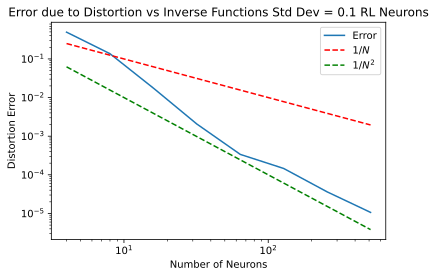

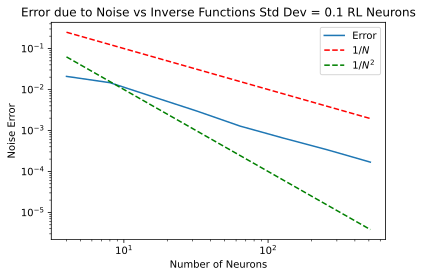

In [9]:
# ✍ 

def initializeRectifiedLinearNeuronsUpdated(numNeurons,xScaling,aMax_array,zeta_array,encoder_array):
    #changed name to fit with assignment document, A is the "matrix of activities"
    A = np.zeros([numNeurons, len(xScaling)])
    for i in range (numNeurons):
        NewNeuron = RectifiedLinearNeuronShell(aMax_array[i],zeta_array[i],encoder_array[i])
        for j,k in enumerate(xScaling):
            a = NewNeuron._encoder*NewNeuron._alpha*k + NewNeuron._jBias
            A[i][j] = max(a,0)
    return A

xScale = np.linspace(-1,1,41)

 
stanDev = 0.1*np.amax(A)
    
def errorDueToNoise(decoder, stanDev):
    return (stanDev*stanDev)*np.sum(np.power(decoder,2))

def errorDueToDistortion(xScale,xHat):
    return (np.sum(np.power((xScale-xHat),2))*0.5)

numNeurons = [4,8,16,32,64,128,256,512]
noiseError = np.zeros(len(numNeurons))
distortionError = np.zeros(len(numNeurons))
numRuns = 5

for i in range (len(numNeurons)):
    noiseErrorTotal = 0
    distortionErrorTotal = 0
    for j in range (numRuns):
        aMax_array = np.random.uniform(100, 200, numNeurons[i])
        zeta_array = np.random.uniform(-0.95,0.95, numNeurons[i])
        encoder_array = np.random.choice([-1,1], numNeurons[i])
        A = initializeRectifiedLinearNeuronsUpdated(numNeurons[i], xScale,aMax_array,zeta_array,encoder_array)
        #incorporate noise
        NoisyA = A + np.random.normal(0, stanDev, np.shape(A))
        #Firing rate should still bottom out at 0 
        for k in range (len(NoisyA)):
            for l in range (len(NoisyA[0])):
                NoisyA[k][l] = max(NoisyA[k][l],0)
        decoder = neuronDecoderWithNoise(A,xScale,stanDev)
        xHat = np.dot(decoder, A)
        noiseErrorTotal += errorDueToNoise(decoder,stanDev)
        distortionErrorTotal += errorDueToDistortion(xScale,xHat)
    
    noiseError[i] = noiseErrorTotal/numRuns
    distortionError[i] = distortionErrorTotal/numRuns 

N_inv = [0] * len(numNeurons)
N_inv2 = [0] * len(numNeurons)
for i,m in enumerate(numNeurons):
    N_inv[i] = (m**(-1))
    N_inv2[i] = (m**(-2))

print(distortionError)
print(noiseError)
plt.figure()
plt.loglog(numNeurons, distortionError, label = "Error")
plt.loglog(numNeurons,N_inv, 'r--', label="1/$N$")
plt.loglog(numNeurons,N_inv2, 'g--', label="1/$N^2$")
plt.legend()
plt.xlabel('Number of Neurons')
plt.ylabel('Distortion Error')
plt.title('Error due to Distortion vs Inverse Functions Std Dev = 0.1 RL Neurons');    

plt.figure()
plt.loglog(numNeurons, noiseError, label = "Error")
plt.loglog(numNeurons,N_inv, 'r--', label="1/$N$")
plt.loglog(numNeurons,N_inv2, 'g--', label="1/$N^2$")
plt.legend()
plt.xlabel('Number of Neurons')
plt.ylabel('Noise Error')
plt.title('Error due to Noise vs Inverse Functions Std Dev = 0.1 RL Neurons'); 


    

**b) Adapting the noise level.** Repeat part a) with $\sigma = 0.01 \max(A)$.

[1.60709359e+00 9.90452763e-03 4.06242257e-04 9.56924455e-05
 1.13246649e-05 3.11915375e-06 7.11165470e-07 2.06675772e-07]
[2.81067750e-03 2.48388722e-04 1.09005133e-04 3.69120833e-05
 1.41795589e-05 7.11927331e-06 3.42815146e-06 1.76594044e-06]


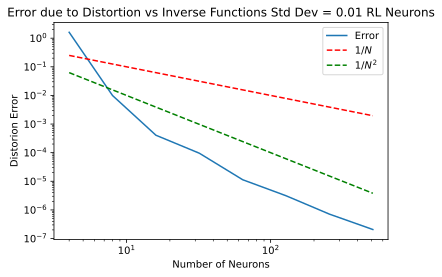

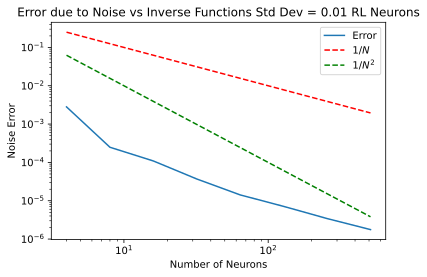

In [10]:
# ✍ 

xScale = np.linspace(-1,1,41)

 
stanDev = 0.01*np.amax(A)


numNeurons = [4,8,16,32,64,128,256,512]
noiseError = np.zeros(len(numNeurons))
distortionError = np.zeros(len(numNeurons))
numRuns = 5

for i in range (len(numNeurons)):
    noiseErrorTotal = 0
    distortionErrorTotal = 0
    for j in range (numRuns):
        aMax_array = np.random.uniform(100, 200, numNeurons[i])
        zeta_array = np.random.uniform(-0.95,0.95, numNeurons[i])
        encoder_array = np.random.choice([-1,1], numNeurons[i])
        A = initializeRectifiedLinearNeuronsUpdated(numNeurons[i], xScale,aMax_array,zeta_array,encoder_array)
        #incorporate noise
        NoisyA = A + np.random.normal(0, stanDev, np.shape(A))
        #Firing rate should still bottom out at 0 
        for k in range (len(NoisyA)):
            for l in range (len(NoisyA[0])):
                NoisyA[k][l] = max(NoisyA[k][l],0)
        decoder = neuronDecoderWithNoise(A,xScale,stanDev)
        xHat = np.dot(decoder, A)
        noiseErrorTotal += errorDueToNoise(decoder,stanDev)
        distortionErrorTotal += errorDueToDistortion(xScale,xHat)
    
    noiseError[i] = noiseErrorTotal/numRuns
    distortionError[i] = distortionErrorTotal/numRuns 

N_inv = np.zeros(len(numNeurons))
N_inv2 = np.zeros(len(numNeurons))
for i,m in enumerate(numNeurons):
    N_inv[i] = (m**(-1))
    N_inv2[i] = (m**(-2))

print(distortionError)
print(noiseError)
plt.figure()
plt.loglog(numNeurons, distortionError, label = "Error")
plt.loglog(numNeurons,N_inv, 'r--', label="1/$N$")
plt.loglog(numNeurons,N_inv2, 'g--', label="1/$N^2$")
plt.legend()
plt.xlabel('Number of Neurons')
plt.ylabel('Distorion Error')
plt.title('Error due to Distortion vs Inverse Functions Std Dev = 0.01 RL Neurons');    

plt.figure()
plt.loglog(numNeurons, noiseError, label = "Error")
plt.loglog(numNeurons,N_inv, 'r--', label="1/$N$")
plt.loglog(numNeurons,N_inv2, 'g--', label="1/$N^2$")
plt.legend()
plt.xlabel('Number of Neurons')
plt.ylabel('Noise Error')
plt.title('Error due to Noise vs Inverse Functions Std Dev = 0.01 RL Neurons'); 

**c) Interpretation.** What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?

✍ In the graphs above we can see that the distortion error is roughly proportional to 1/N^2 while the error due to noise is roughly proportional to 1/N. The lines do tend to have different intercepts but their slopes are similar especially as we increase the number of neurons. In both cases we can see that noise error tends to overtake distortion error as the number of neurons approaches inifinity, this is a clear result of the proportionality discussed above. In terms of the difference between graphs a and b, it seems like a smaller standard deviation results in a faster decline in both errors as the number of neurons increases. This makes intuitive sense because the neurons in the population are more similar. 

## 1.3 Leaky Integrate-and-Fire neurons

**a) Computing gain and bias.** As in the second part of 1.1a), given a maximum firing rate $a^\mathrm{max}$ and a bias $J^\mathrm{bias}$, write down the equations for computing $\alpha$ and the $J^\mathrm{bias}$ for this specific neuron model.

✍Math completed on paper, availible on request

$$ \alpha =  \dfrac {1}{(1+\xi)*(1-e^{(a^\mathrm{max}*\mathrm{tau}_{ref}-1)/(a^\mathrm{max}*\mathrm{tau}_{RC})})} $$

$$J^\mathrm{bias} = \alpha * \xi$$


**b) Neuron tuning curves.** Generate the same plot as in 1.1b). Use $\tau_\mathrm{ref}=2 \mathrm{ms}$ and $\tau_{RC}=20 \mathrm{ms}$. Use the same distribution of $x$-intercepts and maximum firing rates as in 1.1.

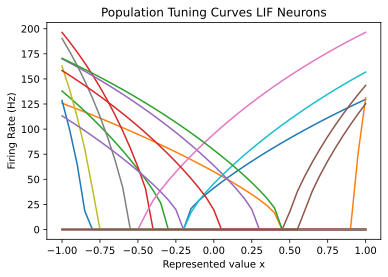

In [11]:
# ✍
class LeakyIntegrateAndFireNeuronShell:
     def __init__(self, aMax, zeta, encoder, tauRef, tauRC):
        
        #preset values
        self._aMax = aMax
        self._zeta = zeta
        self._encoder = encoder
        self._tauRef = tauRef
        self._tauRC = tauRC
        
        #calculated values
        self._alpha = (1/(1+self._zeta)*(1/(1-np.exp((self._aMax*self._tauRef -1)/(self._aMax*self._tauRC)))))
        self._jBias = self._alpha*self._zeta
        

        
def initializeLeakyIntegrateAndFireNeurons(numNeurons,xScaling,aMax_array,zeta_array,encoder_array, tauRef, tauRC):
    #changed name to fit with assignment document, A is the "matrix of activities"
    A = np.zeros([numNeurons, len(xScaling)])
    for i in range (numNeurons):
        NewNeuron = LeakyIntegrateAndFireNeuronShell(aMax_array[i],zeta_array[i],encoder_array[i], tauRef, tauRC)
        for l,k in enumerate(xScaling):
            j = NewNeuron._encoder*NewNeuron._alpha*k + NewNeuron._jBias
            if (j > 1):
                a = np.power(tauRef - (tauRC*np.log(1-np.power(j,-1))),-1) 
            else:
                a = 0
            A[i][l] = a
    return A

numberNeurons = 16
tauRef = 0.002
tauRC = 0.02

aMax_array = np.random.uniform(100, 200, numberNeurons)
zeta_array = np.random.uniform(-0.95,0.95, numberNeurons)
encoder_array = np.random.choice([-1,1], numberNeurons)

A = initializeLeakyIntegrateAndFireNeurons(numberNeurons, xScale, aMax_array, zeta_array, encoder_array, tauRef, tauRC)

for i in range(0,numberNeurons):
    plt.plot(xScale, A[i])
plt.xlabel("Represented value x") 
plt.ylabel("Firing Rate (Hz)")
plt.title('Population Tuning Curves LIF Neurons');
    

**c) Impact of noise.** Generate the same four plots as in 1.1f) (adding/not adding noise to $A$, accounting/not accounting for noise when computing $\vec d$), and report the RMSE both with and without noise.

 
 Root Mean Squared Error Values under Different Conditions:


,Ideal Activity,Noisy Activity
Ideal Decoder,0.006312311743073135,0.25933279544021537
Decoder Which Considers Noise,0.029713016833375752,0.13920153337008456


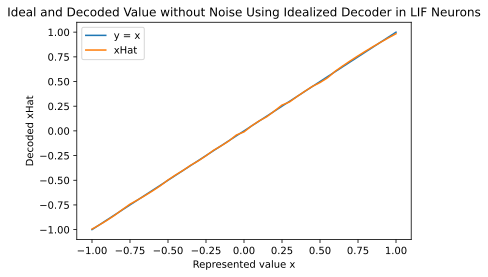

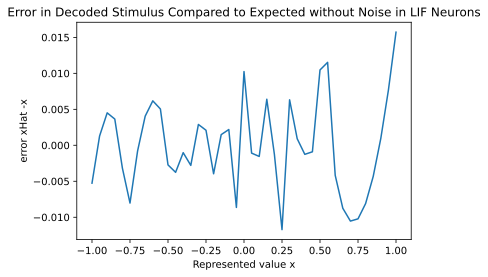

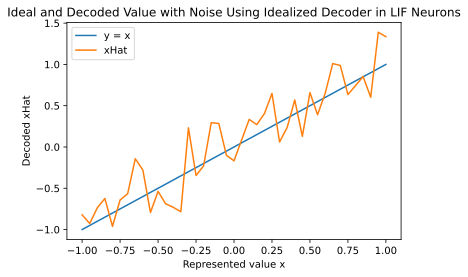

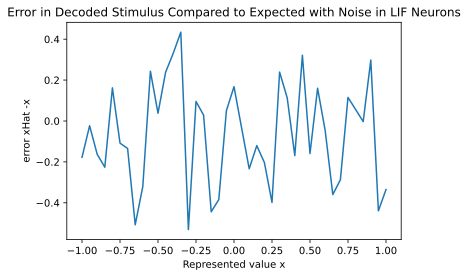

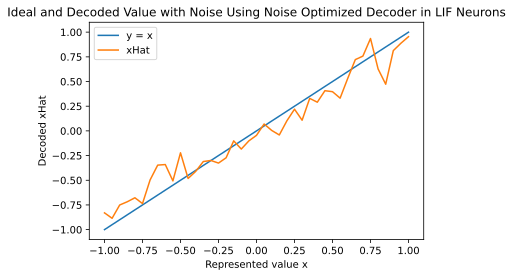

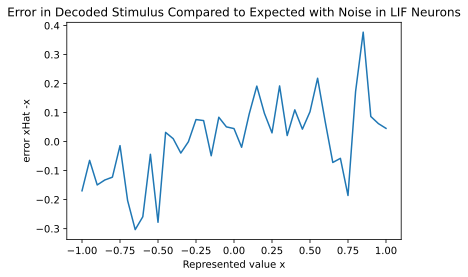

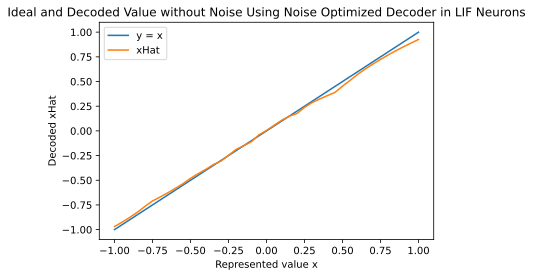

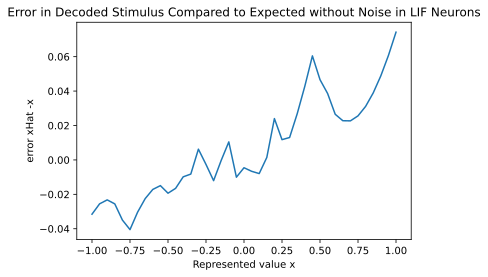

In [12]:
# ✍ 
#assuming stanDev is still 0.2aMax(A)

numberNeurons = 16
tauRef = 0.002
tauRC = 0.02

aMax_array = np.random.uniform(100, 200, numberNeurons)
zeta_array = np.random.uniform(-0.95,0.95, numberNeurons)
encoder_array = np.random.choice([-1,1], numberNeurons)

A = initializeLeakyIntegrateAndFireNeurons(numberNeurons, xScale, aMax_array, zeta_array, encoder_array, tauRef, tauRC)

decoder = neuronDecoderNoNoise(A, xScale)

NoisyA = A + np.random.normal(0, 0.2*np.amax(A), np.shape(A))
for i in range (len(NoisyA)):
    for j in range (len(NoisyA[0])):
        NoisyA[i][j] = max(NoisyA[i][j],0)

xHat = np.dot(decoder, A)
y = xScale
error = y - xHat

plt.figure()
plt.plot(xScale,y, label = "y = x")
plt.plot(xScale, xHat, label = "xHat")
plt.legend()
plt.xlabel("Represented value x") 
plt.ylabel("Decoded xHat")
plt.title('Ideal and Decoded Value without Noise Using Idealized Decoder in LIF Neurons');

plt.figure()
plt.plot(xScale, error)
plt.xlabel("Represented value x") 
plt.ylabel("error xHat -x")
plt.title('Error in Decoded Stimulus Compared to Expected without Noise in LIF Neurons');

RMSE1 = str(rootMeanSquared(xHat,y))



xHat = np.dot(decoder, NoisyA)
y = xScale
error = y - xHat


plt.figure()
plt.plot(xScale,y, label = "y = x")
plt.plot(xScale, xHat, label = "xHat")
plt.legend()
plt.xlabel("Represented value x") 
plt.ylabel("Decoded xHat")
plt.title('Ideal and Decoded Value with Noise Using Idealized Decoder in LIF Neurons');

plt.figure()
plt.plot(xScale, error)
plt.xlabel("Represented value x") 
plt.ylabel("error xHat -x")
plt.title('Error in Decoded Stimulus Compared to Expected with Noise in LIF Neurons');


RMSE2 = str(rootMeanSquared(xHat,y))


decoder = neuronDecoderWithNoise(A, xScale, 0.2*np.amax(A)) #DO NOT ADD NOISE HERE

xHat = np.dot(decoder, NoisyA)
error = y - xHat

#print(y)
#print(xHat)
#print(error)

plt.figure()
plt.plot(xScale,y, label = "y = x")
plt.plot(xScale, xHat, label = "xHat")
plt.legend()
plt.xlabel("Represented value x") 
plt.ylabel("Decoded xHat")
plt.title('Ideal and Decoded Value with Noise Using Noise Optimized Decoder in LIF Neurons');

plt.figure()
plt.plot(xScale, error)
plt.xlabel("Represented value x")
plt.ylabel("error xHat -x")
plt.title('Error in Decoded Stimulus Compared to Expected with Noise in LIF Neurons');



RMSE3 = str(rootMeanSquared(xHat,y))




xHat = np.dot(decoder, A)
error = y - xHat

#print(y)
#print(xHat)
#print(error)


plt.figure()
plt.plot(xScale,y, label = "y = x")
plt.plot(xScale, xHat, label = "xHat")
plt.legend()
plt.xlabel("Represented value x") 
plt.ylabel("Decoded xHat")
plt.title('Ideal and Decoded Value without Noise Using Noise Optimized Decoder in LIF Neurons');

plt.figure()
plt.plot(xScale, error)
plt.xlabel("Represented value x")
plt.ylabel("error xHat -x")
plt.title('Error in Decoded Stimulus Compared to Expected without Noise in LIF Neurons');


RMSE4 = str(rootMeanSquared(xHat,y))


coloumList = ["Ideal Decoder", "Decoder Which Considers Noise"]
rowList = ["Ideal Activity", "Noisy Activity"]

RMSEValues = np.array([[RMSE1, RMSE2],[RMSE4,RMSE3]])

print(" \n Root Mean Squared Error Values under Different Conditions:")
pandas.DataFrame(RMSEValues, coloumList, rowList)

# 2. Reperesentation of Vectors

## 2.1 Vector tuning curves

**a) Plotting 2D tuning curves.** Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an $x$-intercept at the origin $(0,0)$, and has a maximum firing rate of $100 \mathrm{Hz}$.

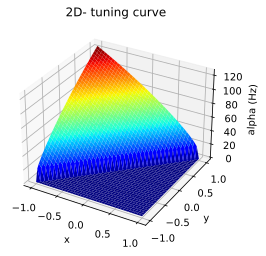

In [13]:
# ✍ 
from mpl_toolkits.mplot3d import Axes3D

class LIFNeuron2D:
    def __init__(self, encoderAngle, aMax, zeta, tauRef, tauRC):
    #set values
        self._encoderAngle = encoderAngle
        self._encoder = [np.cos(encoderAngle), np.sin(encoderAngle)]
        self._aMax = aMax
        self._zeta = zeta
        self._tauRef = tauRef
        self._tauRC = tauRC
        
        self._alpha =(1 - (1 - np.exp((self._tauRef - 1/self._aMax)/self._tauRC)))/((1 - np.exp((self._tauRef - 1/self._aMax)/self._tauRC))*np.dot(self._encoder,self._encoder) - np.vdot(self._encoder,self._zeta))
        self._jBias = 1 - self._alpha*np.vdot(self._encoder,self._zeta)
        
def initializeLIF2DNeuron(xyCoords, encoder, aMax, zeta, tauRef, tauRC):
    A = []
    neuron2D =  LIFNeuron2D(encoder, aMax, zeta, tauRef, tauRC)
    for i in xyCoords:
        #print(i)
        #print(neuron2D._alpha)
        J = neuron2D._alpha*np.dot(i,neuron2D._encoder) + neuron2D._jBias
        if (J > 1):
            a = np.power(tauRef - (tauRC*np.log(1-np.power(J,-1))),-1)
            #print(a)
        else:
            a = 0
        A.append(a)
    return A
    
    
angle = -np.pi/4
x = np.linspace(-1,1,41)
y = np.linspace(-1,1,41)
x,y = np.meshgrid(x,y)

xyCoords = []
for i in range(len(x)):
    for j in range(len(x)):
        xyCoords.append([x[j][i],y[j][i]])
A = initializeLIF2DNeuron(xyCoords,angle,100,[0,0],0.002,0.02)
A = np.reshape(A,(41,41))

plo = plt.gca(projection = '3d')
plt.title("2D- tuning curve")
plt.xlabel("x")
plt.ylabel("y")
plo.set_zlabel("alpha (Hz)")
surf = plo.plot_surface(X = x, Y = y, Z = A, cmap =plt.cm.jet )
show()
    

**b) Plotting the 2D tuning curve along the unit circle.** Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle, i.e., sample the activation for different angles $\theta$. Fit a curve of the form $c_1 \cos(c_2\theta+c_3)+c_4$ to the tuning curve and plot it as well.

[0, 0, 0, 0, 0, 1.3833687331412654, 32.85899424921482, 47.516456591633656, 59.9541284087683, 70.62212393522933, 79.61728720460378, 86.96455789101356, 92.67212986738613, 96.74478048232963, 99.18645658416077, 100.0, 99.18645658416077, 96.74478048232963, 92.67212986738613, 86.96455789101356, 79.61728720460378, 70.62212393522933, 59.9541284087683, 47.516456591633656, 32.85899424921482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Curve arguments: [55.99009373  1.13611511 -5.42369781 39.91082572]


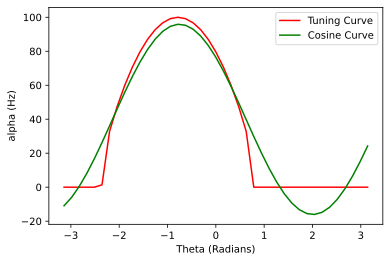

In [14]:
# ✍ 
#Back to 2D, thank god

from scipy.optimize import curve_fit

def curve(x, a, b, c,d):
    return a * np.cos(b * x + c) + d

xyCoordsAngles = []
Theta = np.linspace(-np.pi,np.pi,41)
for coordinates in Theta:
    coord = [np.cos(coordinates), np.sin(coordinates)]
    xyCoordsAngles.append(coord)
#print(xyCoordsAngles)


    
A = initializeLIF2DNeuron(xyCoordsAngles,-np.pi/4,100,[0,0],0.002,0.02)

print(A)

#cos = []
#for coord in Theta:
 #   cos.append(cosfunc())
    
popt, pcov = curve_fit(curve, Theta, A)
print ("Curve arguments: " + str(popt))


TuningCurve = plt.plot(Theta, A, 'r', label = 'Tuning Curve')
CosineCurve = plt.plot(Theta, curve(Theta,*popt), 'g', label = 'Cosine Curve')
plt.ylabel("alpha (Hz)")
plt.xlabel("Theta (Radians)")
legend(handles=[TuningCurve,CosineCurve],labels=[])
show()



**c) Discussion.** What makes a cosine a good choice for the curve fit in 2.1b? Why does it differ from the ideal curve?

✍ The cosine curve is an obviously good choice because it closely approximates the quickly increasing z values that as you draw a unit circle going up a hill. In particular, it does a good job of representing this sort of circular curve that peaks at a single point. The only problem with the cosine curve, is that it also assumes there will be an adjacent valley, where our 3d space/ tuning curve, actually flattens out when not taking values on the hill. This results in that extra bit of waviness on the cosine curve that accompanies the flat segments of the tuning curve

## 2.2 Vector representation

**a) Choosing encoding vectors.** Generate a set of $100$ random unit vectors uniformly distributed around the unit circle. These will be the encoders $\vec e$ for $100$ neurons. Plot these vectors with a quiver or line plot (i.e., not just points, but lines/arrows to the points).

Text(0, 0.5, 'y')

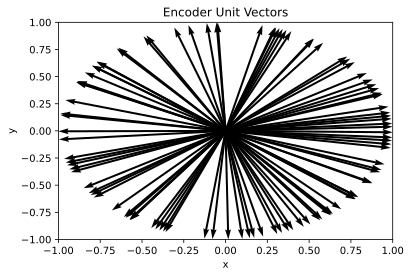

In [15]:
# ✍ 

numUnitVectors = 100
EncoderDirectionCoord = np.zeros([numUnitVectors,2])
#for next question
EncoderAngles = np.zeros([numUnitVectors])

for i in range (numUnitVectors):
    #generate random uniformly distributed angle around circle
    theta = np.random.uniform(0,np.pi*2)
    EncoderDirectionCoord[i][0] = np.cos(theta)
    EncoderDirectionCoord[i][1] = np.sin(theta)
    EncoderAngles[i] = theta

    

xy = np.zeros(len(EncoderDirectionCoord))
    
figure()

plo = plt.gca()

plo.quiver(xy,xy,EncoderDirectionCoord[:,0],EncoderDirectionCoord[:,1],angles='xy',scale_units='xy', scale =1)
plo.set_xlim([-1,1])
plo.set_ylim([-1,1])
title("Encoder Unit Vectors")
xlabel('x')
ylabel('y')


**b) Computing the identity decoder.** Use LIF neurons with the same properties as in question 1.3. When computing the decoders, take into account noise with $\sigma = 0.2\max(A)$. Plot the decoders in the same way you plotted the encoders.

Text(0, 0.5, 'y')

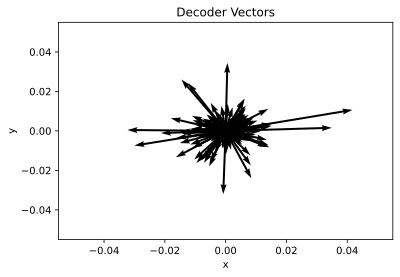

In [16]:
# ✍ 
x = np.linspace(-1,1,40)
y = np.linspace(-1,1,40)
x,y = np.meshgrid(x,y)

#1600 x values woot
tiling = []
for i in range(len(x)):
    for j in range(len(y)):
        tiling.append([x[i][j], y[i][j]])

Neurons = []
A = []
aMax_array = np.random.uniform(100, 200, numUnitVectors)
encoderAngle = np.random.uniform(0,2*np.pi)
encoderDirectionCoords = []
for i in range(numUnitVectors):
    encoderAngle = np.random.uniform(0,2*np.pi)
    encoderDirectionCoord = [np.cos(encoderAngle), np.sin(encoderAngle)]
    encoderDirectionCoords.append(encoderDirectionCoord)
    n = LIFNeuron2D(EncoderAngles[i],aMax_array[i],encoderDirectionCoord, 0.002,0.02)
    Neurons.append(n)
    a = initializeLIF2DNeuron(tiling,EncoderAngles[i],aMax_array[i],encoderDirectionCoord, 0.002,0.02)
    A.append(a)

stanDev = 0.2*np.amax(A)
NoisyA = A + np.random.normal(0, stanDev, np.shape(A))
#print(NoisyA)
for i in range (len(NoisyA)):
    for j in range (len(NoisyA[0])):
        NoisyA[i][j] = max(NoisyA[i][j],0)

decoder = neuronDecoderWithNoise(A, tiling, stanDev)
#print(decoder)

#fun alternative to 2d arrays that I recetnly learned about, the below sort of performs an "unzipping"
u,v = zip(*decoder)

xy = np.zeros(len(decoder))

figure()
plo = plt.gca()
plo.quiver(xy,xy,u,v,angles='xy',scale_units='xy', scale =0.015)
#plt.plot(u,v,'*')
title("Decoder Vectors")
plt.xlabel('x')
plt.ylabel('y')


**c) Discussion.** How do these decoding vectors compare to the encoding vectors?

✍ The decoding vectors share a simiarly uniform angular distribution with their encoding counterparts (somewhat obviously because of the way they are coded). They also have some variance coding into their magnitudes and so do not lie exclusively on the unit circle. Beyond that, the magnitudes of the decoders are quite a lot smaller than those of the encoders.

**d) Testing the decoder.** Generate 20 random $\vec x$ values throughout the unit circle (i.e.,~with different directions and radiuses). For each $\vec x$ value, determine the neural activity $a_i$ for each of the 100 neurons. Now decode these values (i.e. compute $\hat{x} = D \vec a$) using the decoders from part b). Plot the original and decoded values on the same graph in different colours, and compute the RMSE.

0.05703328665377292


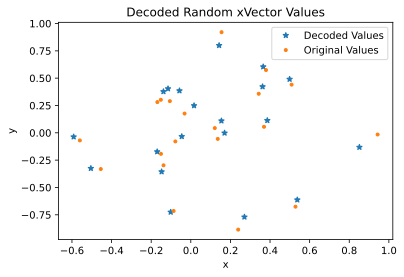

In [17]:
# ✍ 
numXValues =20

#generating x values
xyValues = np.zeros([numXValues,2])
angles = np.random.uniform(0,np.pi*2, numXValues)
radiuses = np.random.uniform(0.0,1.0, numXValues)
for i in range(numXValues):
    xy = [radiuses[i]*np.cos(angles[i]), radiuses[i]*np.sin(angles[i])]
    xyValues[i] = xy
    
A = []
#aMax_array = np.random.uniform(100, 200, numUnitVectors) this was wrong, didn't want to generate new array
for i in range(numUnitVectors):
    a = initializeLIF2DNeuron(xyValues,EncoderAngles[i],aMax_array[i],encoderDirectionCoords[i], 0.002,0.02)
    A.append(a)

decodedValues = np.dot(np.transpose(A),decoder)
#print(decodedValues)

#possibly would be easier to follow if I stuck to either lists or arrays, but I am still not sure which I prefer
#curious about time/space efficiency differences 
x = xyValues[:,0]
y = xyValues[:,1]
u,v = zip(*decodedValues)

figure()
plo = plt.gca()
plt.plot(u,v,'*', label = "Decoded Values")
plt.plot(x,y,'.', label = "Original Values")
plt.legend()
title("Decoded Random xVector Values")
plt.xlabel('x')
plt.ylabel('y')

print(rootMeanSquared(xyValues, decodedValues))
    

**e) Using encoders as decoders.** Repeat part d) but use the *encoders* as decoders. This is what Georgopoulos used in his original approach to decoding information from populations of neurons. Plot the decoded values and compute the RMSE. In addition, recompute the RMSE in both cases, but ignore the magnitude of the decoded vectors by normalizing before computing the RMSE.

unnormalized RMSE encoders and decoders:  490.9269653495488
normalized RMSE encoders and decoders:  0.250390606503405
normalized RMSE decoders:  0.022650228318113242


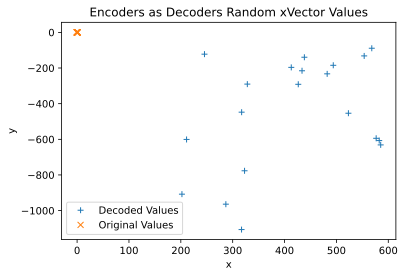

In [18]:
# ✍ To be honest, I have NO idea how to do this part, 
# the theory makes some sense to be me but in terms of code I am totally lost
# The code below is my best guess
# There are a bunch of points in the top left corner but they are all really close together

encoderAsDecoder = np.dot(np.transpose(A),EncoderDirectionCoord)

x = xyValues[:,0]
y = xyValues[:,1]
u,v = zip(*encoderAsDecoder)

figure()
plo = plt.gca()
plt.plot(u,v,'+', label = "Decoded Values")
plt.plot(x,y,'x', label = "Original Values")
plt.legend()
title("Encoders as Decoders Random xVector Values")
plt.xlabel('x')
plt.ylabel('y')

print("unnormalized RMSE encoders and decoders:  " + str(rootMeanSquared(xyValues, encoderAsDecoder)))

xyValues = xyValues/(np.sqrt(np.sum(xyValues**2)))
encoderAsDecoder = encoderAsDecoder/(np.sqrt(np.sum(encoderAsDecoder**2)))
decodedValues = decodedValues/(np.sqrt(np.sum(decodedValues**2)))

print("normalized RMSE encoders and decoders:  " + str(rootMeanSquared(xyValues, encoderAsDecoder)))

print("normalized RMSE decoders:  " + str(rootMeanSquared(xyValues, decodedValues)))



**f) Discussion.** When computing the RMSE on the normalized vectors, using the encoders as decoders should result in a larger, yet still surprisingly small error. Thinking about random unit vectors in high dimensional spaces, why is this the case? What are the relative merits of these two approaches to decoding?

✍ Soo, I am not entirely sure how to answer this question as I an not convinced that my above code works... However, based on the assumptions made here it seems that I am maybe in the right ball park at least? It's easy to imagine how unnormalized vectors can have MUCH larger errors because the distance between the tips of vectors is magnified massively as they move away from their common orgin, whereas this effect is mitigated when they are normalized... In terms of merits it seems like using decoders as decoders provides better accuracy. I can't really imagine what benefit there is to using encoders as decoders, except possibly the non-linearity somehow providing some benefit? I'm not even sure I am understanding that part correctly...
Anyway, fun assignment, interesting stuff to think about!